# 5 Linear Systems

*Overview*

- [5.0 Introduction](#5.0-Introduction)
- [5.1 Definitions and Exmaples](#5.1 Definitions-and-Exmaples)

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np

c = ['#1f77b4', 
     '#ff7f0e', 
     '#2ca02c', 
     '#d62728', 
     '#9467bd', 
     '#8c564b', 
     '#e377c2', 
     '#7f7f7f', 
     '#bcbd22', 
     '#17becf']

l = ['-', '--', '-.', ':']
m = ['o', 'x', 's']

$$\begin{align*}
& \quad\quad (5.)
\end{align*}$$

## 5.0 Introduction
---

## 5.1 Definitions and Exmaples
---

**two-dimensional lilnear system**

$$\begin{align*}
\dot{x} &= ax + by \\
\dot{y} &= cx + dy
\end{align*}$$

$$\mathbf{\dot{x}} = \mathbf{Ax}$$

where

$$\begin{align*}
\mathbf{A} = 
\begin{pmatrix}
a & b \\
c & d
\end{pmatrix}
\quad \text{and} \quad
\mathbf{x} = 
\begin{pmatrix}
x \\
y
\end{pmatrix}
\end{align*}$$

### Example 5.1.1

**simple harmonic oscillator**

$$\begin{align*}
m\ddot{x} + kx = 0
& \quad\quad (5.1.1)
\end{align*}$$

- $m$: mass
- $k$: spring constant
- $x$: displacement of the mass drom equilibrium


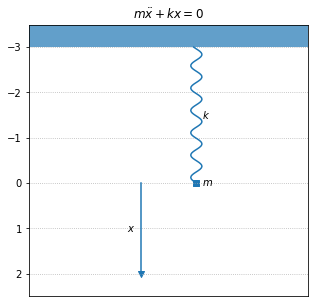

In [14]:
plt.figure(figsize=(5, 5))

# k
k = 3
plt.plot(np.sin(np.linspace(-k, 0, 100)*40/np.pi)*.1, np.linspace(-k, 0, 100), c=c[0], linestyle=l[0])
plt.text(0.1, -k/2, r'$k$', horizontalalignment='left', verticalalignment='center')

# m
plt.scatter(0, 0, c=c[0], marker=m[2])
plt.text(0.1, 0, r'$m$', horizontalalignment='left', verticalalignment='center')

# x
x = 2
plt.plot(np.array([-1, -1]), np.array([0, x]), c=c[0], linestyle=l[0])
plt.text(-1.1, x/2, r'$x$', horizontalalignment='right', verticalalignment='center')
plt.scatter(-1, x, c=c[0], marker='v')

plt.axhspan(-3.5, -3, facecolor=c[0], alpha=.7)

# plt.plot(np.array([0, -1.5]), np.array([0, 0]), c=c[0], linestyle=l[1])

plt.title(r'$m\ddot{x} + kx = 0$')
plt.xlim(-3, 2)
plt.ylim(2.5, -3.5)
plt.xticks([])
# plt.yticks([])
plt.grid(True, linestyle=l[3])

plt.show()

$$\begin{align*}
\dot{x} &= v
& \quad\quad (5.1.2a) \\
\dot{v} &= -\frac{k}{m} x
& \quad\quad (5.1.2b)
\end{align*}$$

(5.1.2a): def of velocity
(5.1.2b): (5.1.1) rewritten

Let $\omega^2 := \frac{k}{m}$

$$\begin{align*}
\dot{x} &= v 
& \quad\quad (5.1.3a) \\
\dot{v} &= -\omega^2 x
& \quad\quad (5.1.3b)
\end{align*}$$

$\begin{pmatrix}\dot{x}\\ \dot{v}\end{pmatrix} = \begin{pmatrix}v\\ -\omega^2x\end{pmatrix}$


$$\begin{align*}
& \quad\quad (5.)
\end{align*}$$

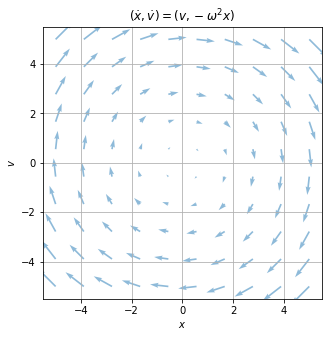

In [19]:
# constant
omega = 1

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

x, v = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, v = np.meshgrid(x, v)

plt.figure(figsize=(5, 5))

plt.quiver(x, v, x_dot(x, v), v_dot(x, v), color=c[0], alpha=.5)

plt.grid(True)
plt.title(r'$(\dot{x}, \dot{v}) = (v, -\omega^2x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')

plt.show()

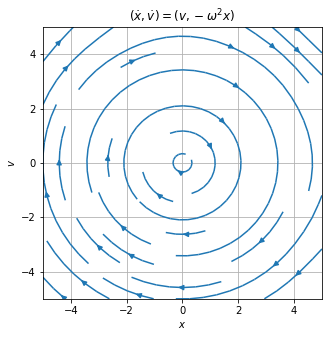

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def x_dot(x, v):
    x_ = v
    return x_

def v_dot(x, v):
    v_ = - omega**2 * x
    return v_

x, v = np.linspace(-5, 5, 10), np.linspace(-5, 5, 10)
x, v = np.meshgrid(x, v)

plt.figure(figsize=(5, 5))

plt.streamplot(x, v, x_dot(x,v), v_dot(x,v), density=.5)

plt.title(r'$(\dot{x}, \dot{v}) = (v, -\omega^2x)$')
plt.xlabel(r'$x$')
plt.ylabel(r'$v$')
plt.grid(True)

plt.show()

### Example 5.1.2

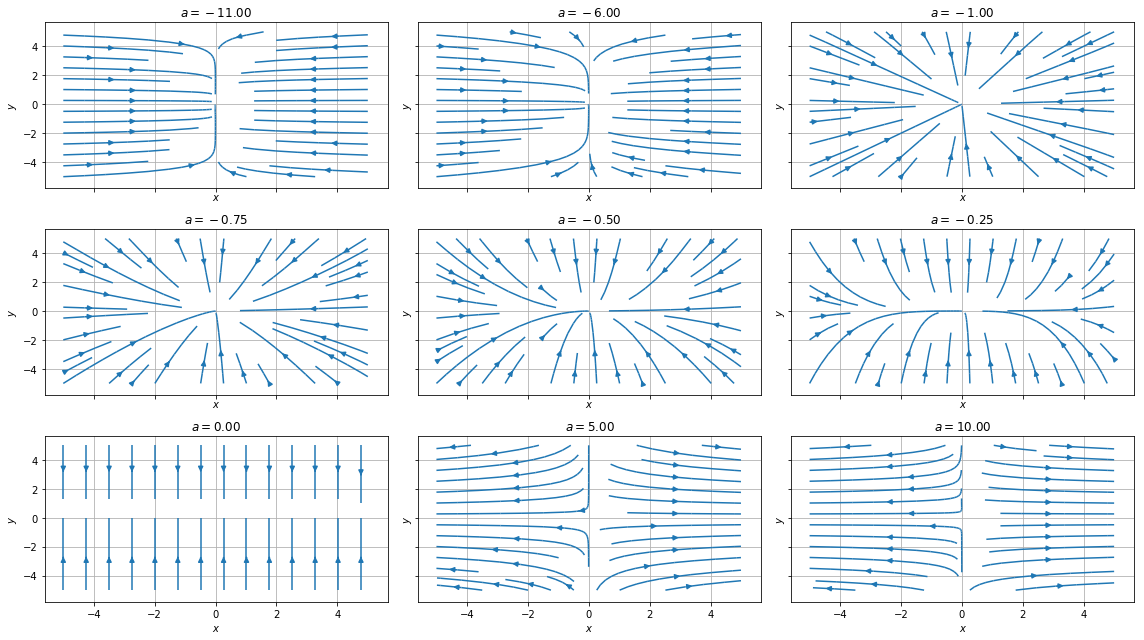

In [60]:
def x_dot(x, y, a):
    x_ = a*x
    return x_

def y_dot(x, y, a):
    y_ = - y
    return y_

# A = np.arange(-1.5, 1, .5)

# A = np.append(np.linspace(-4.5, -1.5, 3), np.linspace(-1, 0, 6), np.linspace(0.5, 3.5, 3))
A = np.array([-11, -6, -1, -0.75, -0.5, -0.25, 0, 5, 10])

x, y = np.linspace(-5, 5, 20), np.linspace(-5, 5, 20)
x, y = np.meshgrid(x, y)

fig, axes = plt.subplots(ncols=3, nrows=3, sharex=True, sharey=True, figsize=(16, 9))

for ax, a in zip(axes.ravel(), A):
    ax.streamplot(x, y, x_dot(x, y, a), y_dot(x, y, a), density=.5, color=c[0])
    ax.set(xlabel=r'$x$', ylabel=r'$y$', title=(r'$a = %.2f$' % a))
    ax.grid(True)

plt.tight_layout()
plt.show()
# print(np.shape(A))


---
*Overview*

- [5.0 Introduction](#5.0-Introduction)
- [5.1 Definitions and Exmaples](#5.1 Definitions-and-Exmaples)
    - [Example 5.1.1](#Example-5.1.1)